In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import scipy.interpolate as sci_interp

In [2]:
datadir = 'C:/Users/mitre/OneDrive/Documents/CICESE/DC_TESIS/Corridas_iniciales/tides/'
u_set = xr.load_dataset(datadir + 'u_tpxo9.v5a.nc')

In [3]:
ny1 = 701
ny2 = 756
nx1 = 1428
nx2 = 1480

nx = 550
ny = 640

T = 44712

xslice = slice(nx1,nx2)
yslice = slice(ny1,ny2)

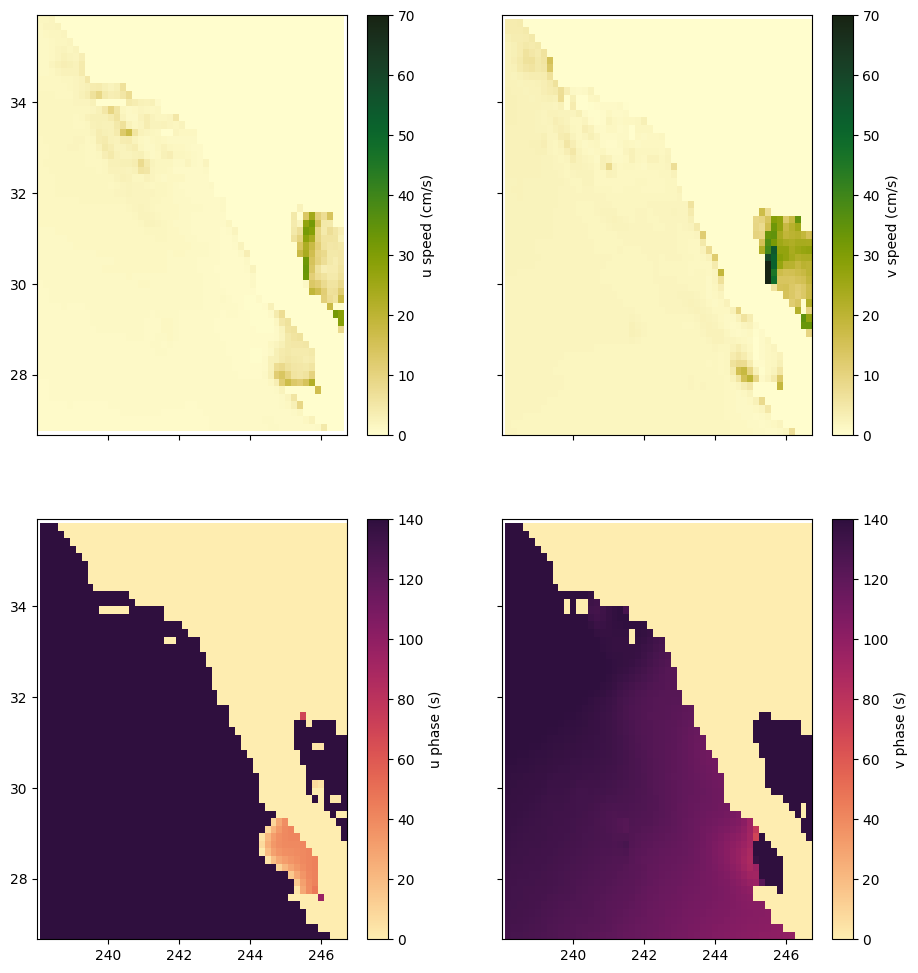

In [4]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(11,12),
                                                     sharex=True, sharey=True)
pc1 = ax1.pcolormesh(u_set.lon_u.isel(nx=xslice, ny=yslice),
                    u_set.lat_u.isel(nx=xslice, ny=yslice),
                    u_set.ua.isel(nc=0, nx=xslice, ny=yslice),
                    cmap=cmo.cm.speed,
                    vmin=0, vmax=70)
plt.colorbar(pc1, ax=ax1, label='u speed (cm/s)')

pc2 = ax2.pcolormesh(u_set.lon_v.isel(nx=xslice, ny=yslice),
                    u_set.lat_v.isel(nx=xslice, ny=yslice),
                    u_set.va.isel(nc=0, nx=xslice, ny=yslice),
                    cmap=cmo.cm.speed,
                    vmin=0, vmax=70)
plt.colorbar(pc2, ax=ax2, label='v speed (cm/s)')

pc3 = ax3.pcolormesh(u_set.lon_v.isel(nx=xslice, ny=yslice),
                    u_set.lat_v.isel(nx=xslice, ny=yslice),
                    u_set.up.isel(nc=0, nx=xslice, ny=yslice),
                    cmap=cmo.cm.matter,
                    vmin=0, vmax=140)
plt.colorbar(pc3, ax=ax3, label='u phase (s)')

pc4 = ax4.pcolormesh(u_set.lon_v.isel(nx=xslice, ny=yslice),
                    u_set.lat_v.isel(nx=xslice, ny=yslice),
                    u_set.vp.isel(nc=0, nx=xslice, ny=yslice),
                    cmap=cmo.cm.matter,
                    vmin=0, vmax=140)
plt.colorbar(pc4, ax=ax4, label='v phase (s)')

In [5]:
lat_u = u_set.lat_u.isel(nx=nx1, ny=yslice)
ua = u_set.ua.isel(nc=0, nx=nx1, ny=yslice)* 0.01
up = u_set.up.isel(nc=0, nx=nx1, ny=yslice)* T / 2 / np.pi
lon_N = u_set.lon_u.isel(nx=xslice, ny=ny1)-360
va_N = u_set.va.isel(nc=0, nx=xslice, ny=ny2)* 0.01
vp_N = u_set.vp.isel(nc=0, nx=xslice, ny=ny2)* T / 2 / np.pi
va_S = u_set.va.isel(nc=0, nx=xslice, ny=ny1)* 0.01
vp_S = u_set.vp.isel(nc=0, nx=xslice, ny=ny1)* T / 2 / np.pi

nx_old = np.arange(0, np.size(va_N,0))
ny_old = np.arange(0, np.size(ua,0))

In [6]:
nx_new = np.arange(0, nx_old[-1], nx_old[-1]/nx)
ny_new = np.arange(0, ny_old[-1], ny_old[-1]/ny)

In [7]:
ua_i = sci_interp.interp1d(ny_old, ua)
ua_b = ua_i(ny_new)

up_i = sci_interp.interp1d(ny_old, up)
up_b = up_i(ny_new)

va_Ni = sci_interp.interp1d(nx_old, va_N)
va_Nb = va_Ni(nx_new)

vp_Ni = sci_interp.interp1d(nx_old, vp_N)
vp_Nb = vp_Ni(nx_new)

va_Si = sci_interp.interp1d(nx_old, va_S)
va_Sb = va_Si(nx_new)

vp_Si = sci_interp.interp1d(nx_old, vp_S)
vp_Sb = vp_Si(nx_new)

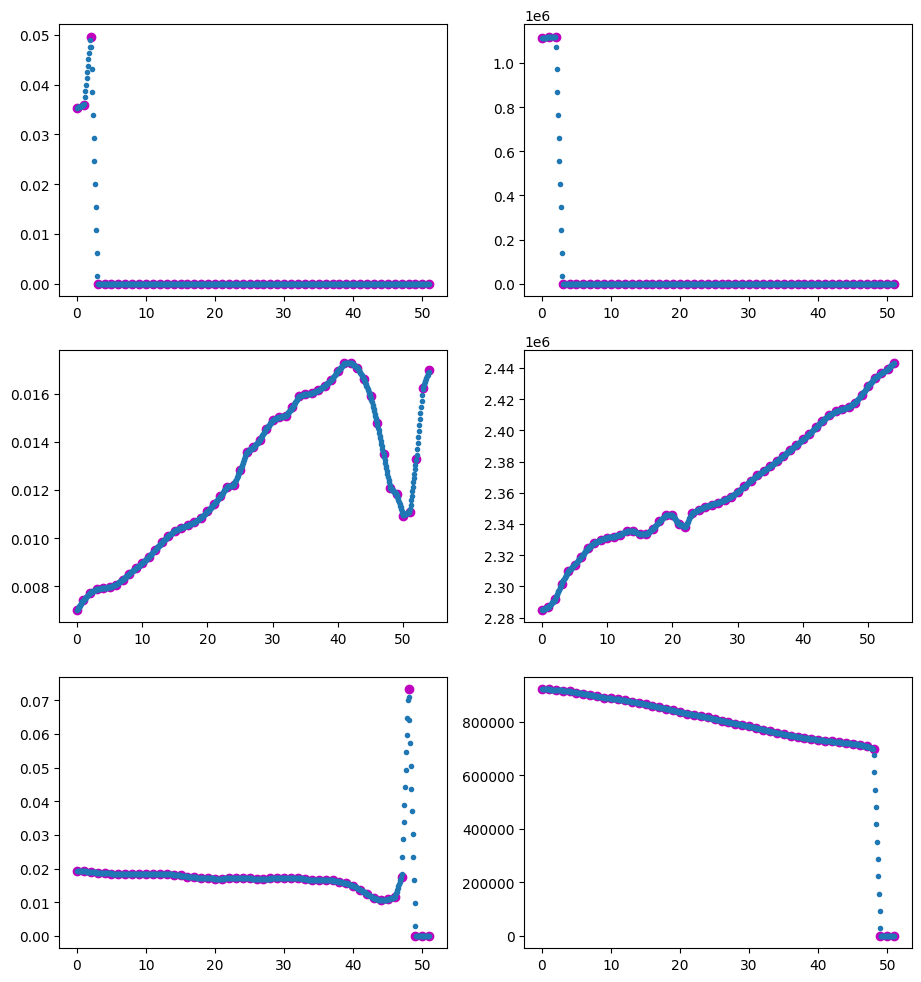

In [8]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(11,12),
                                                     )
pc1 = ax1.plot(nx_old,va_N,'mo')
ax1.plot(nx_new,va_Nb,'.')

pc2 = ax2.plot(nx_old,vp_N,'mo')
ax2.plot(nx_new,vp_Nb,'.')

pc3 = ax3.plot(ny_old,ua,'mo')
ax3.plot(ny_new,ua_b,'.')

pc4 = ax4.plot(ny_old,up,'mo')
ax4.plot(ny_new,up_b,'.')

pc5 = ax5.plot(nx_old,va_S,'mo')
ax5.plot(nx_new,va_Sb,'.')

pc6 = ax6.plot(nx_old,vp_S,'mo')
ax6.plot(nx_new,vp_Sb,'.')

In [9]:
OBNamFile = 'OBNam.bin'
OBNphFile = 'OBNph.bin'

OBWamFile = 'OBWam.bin'
OBWphFile = 'OBWph.bin'

OBSamFile = 'OBSam.bin'
OBSphFile = 'OBSph.bin'

dt = np.dtype('>f8')  # float 64 big endian

fileobj = open(OBNamFile,mode='wb')
va_Nb.astype(dt).tofile(fileobj,"")
fileobj.close()

fileobj = open(OBNphFile,mode='wb')
vp_Nb.astype(dt).tofile(fileobj,"")
fileobj.close()

fileobj = open(OBWamFile,mode='wb')
ua_b.astype(dt).tofile(fileobj,"")
fileobj.close()

fileobj = open(OBWphFile,mode='wb')
up_b.astype(dt).tofile(fileobj,"")
fileobj.close()

fileobj = open(OBSamFile,mode='wb')
va_Sb.astype(dt).tofile(fileobj,"")
fileobj.close()

fileobj = open(OBSphFile,mode='wb')
vp_Sb.astype(dt).tofile(fileobj,"")
fileobj.close()